In [78]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import pickle

In [82]:
# Load the dataset
file_path = 'Algerian_forest_fires_cleaned.csv'
df = pd.read_csv("C:/Users/aravind/Downloads/Algerian_forest_fires_cleaned (1).csv")

In [83]:
#Data Cleaning
# Drop any rows with missing values
df = df.dropna()

In [84]:
print(df.describe())

              day       month    year  Temperature          RH          Ws  \
count  243.000000  243.000000   243.0   243.000000  243.000000  243.000000   
mean    15.761317    7.502058  2012.0    32.152263   62.041152   15.493827   
std      8.842552    1.114793     0.0     3.628039   14.828160    2.811385   
min      1.000000    6.000000  2012.0    22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0    30.000000   52.500000   14.000000   
50%     16.000000    8.000000  2012.0    32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0    35.000000   73.500000   17.000000   
max     31.000000    9.000000  2012.0    42.000000   90.000000   29.000000   

             Rain        FFMC         DMC          DC         ISI         BUI  \
count  243.000000  243.000000  243.000000  243.000000  243.000000  243.000000   
mean     0.762963   77.842387   14.680658   49.430864    4.742387   16.690535   
std      2.003207   14.349641   12.393040   47.665606 

In [85]:
#Handling the erros

df.dropna(inplace=True) 
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [86]:
# Dropping unnecessary columns

df = df.drop(columns=['day', 'month', 'year', 'Classes', 'Region'])
print(df.head())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5


In [87]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


##

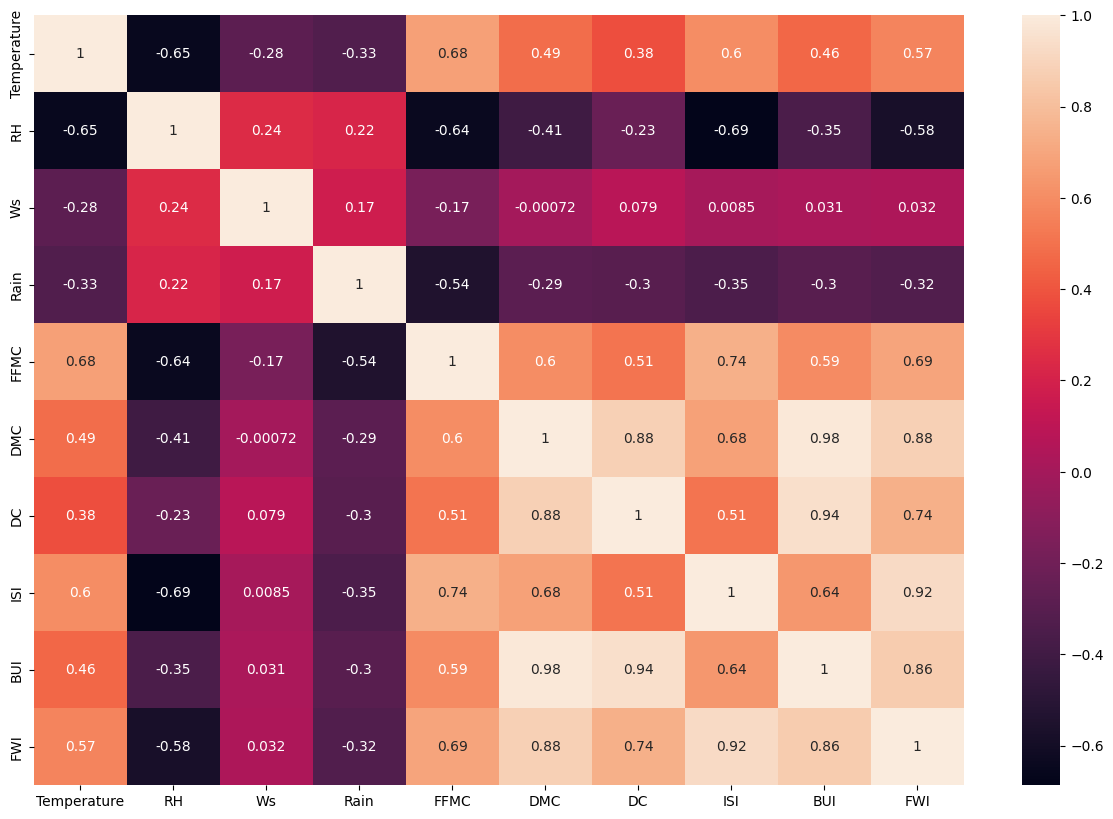

In [88]:
#Data Visualization
# Heat map
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [89]:
#Feature Selection
# Separating features (X) and target variable (y)
X = df.drop(columns=['FWI'])
y = df['FWI']

##

In [90]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##

In [91]:
#Model Building
# # Multiple Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
pn_model = LinearRegression()
pn_model.fit(X_poly_train, y_train)

# Ridge Regression (Regularization)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Lasso Regression (Regularization)
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)


Lasso(alpha=0.5)

##

In [92]:
#Cross-validation and hyperparameter tuning
# Cross-validation for each model
cv_score_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2').mean()
cv_score_ridge = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2').mean()
cv_score_lasso = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2').mean()

print(f"Linear Regression CV Score: {cv_score_lr}")
print(f"Ridge Regression CV Score: {cv_score_ridge}")
print(f"Lasso Regression CV Score: {cv_score_lasso}")

Linear Regression CV Score: 0.9549936816949914
Ridge Regression CV Score: 0.9550004690942107
Lasso Regression CV Score: 0.9565281389556629


In [93]:
# Hyperparameter tuning for Ridge and Lasso using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)

c:\Users\henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.144e+02, tolerance: 9.104e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.101e+02, tolerance: 9.264e-01
  model = cd_fast.enet_coordinate_descent(
c:\Users\henry\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]})

In [94]:
print(f"Best Ridge Alpha: {ridge_cv.best_params_}")
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")

Best Ridge Alpha: {'alpha': 100}
Best Lasso Alpha: {'alpha': 0.1}


In [95]:
#valuate model performance on test set
y_pred_lr = lr_model.predict(X_test)
print(f"Linear Regression R2: {r2_score(y_test, y_pred_lr)}")
y_pred_pn = pn_model.predict(X_poly_test)
print(f"Polynomial Regression R2: {r2_score(y_test, y_pred_pn)}")
y_pred_ridge = ridge_model.predict(X_test)
print(f"Ridge Regression R2: {r2_score(y_test, y_pred_ridge)}")
y_pred_lasso = lasso_model.predict(X_test)
print(f"Lasso Regression R2: {r2_score(y_test, y_pred_lasso)}")

Linear Regression R2: 0.9882726857720828
Polynomial Regression R2: 0.9909308700631237
Ridge Regression R2: 0.9882626745718124
Lasso Regression R2: 0.969166144983552


In [96]:
#Save the models as pickle files
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

with open('polynomial_model.pkl', 'wb') as f:
    pickle.dump(pn_model, f)


with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(ridge_model, f)

with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

In [97]:
#Testing on unseen data
# Sample Unseen Data
import pandas as pd

# Create a sample DataFrame for unseen data
data = [3, 1.2, 11,0, 0.1, 0.8, 0.6, 5, 1,0.5]
# Create DataFrame
unseen_df = pd.DataFrame(data)

In [98]:
# Load the saved models
with open('linear_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

In [99]:
with open('polynomial_model.pkl', 'rb') as f:
    pn_model = pickle.load(f)

In [100]:
with open('ridge_model.pkl', 'rb') as f:
    ridge_model = pickle.load(f)

In [101]:
with open('lasso_model.pkl', 'rb') as f:
    lasso_model = pickle.load(f)

In [ ]:
# Predictions
pred_lr = lr_model.predict(unseen_df)
pred_pn = pn_model.predict(unseen_df)
pred_ridge = ridge_model.predict(unseen_df)
pred_lasso = lasso_model.predict(unseen_df)

In [ ]:
# Output predictions
print("Predictions on Unseen Data:")
print("Linear Regression Prediction:", pred_lr)
print("Polynomial Regression Prediction:", pred_pn)
print("Ridge Regression Prediction:", pred_ridge)
print("Lasso Regression Prediction:", pred_lasso)